<a href="https://colab.research.google.com/github/abdellahlouchahi/AdaptiveLoadBalancing/blob/main/Regression_Servers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model
import pickle

In [18]:
#url = 'https://raw.githubusercontent.com/julianvanmeggelen/AdaptiveLoadBalancing/main/data/simulatedData_2.csv'
url = 'https://raw.githubusercontent.com/julianvanmeggelen/AdaptiveLoadBalancing/main/data/simulatedData_4.csv'
df = pd.DataFrame(pd.read_csv(url))
# df = df.drop(columns=['CurrentPeriodNumberOfServers'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    672 non-null    int64  
 1   periodIndex                   672 non-null    int64  
 2   totalInQueue                  672 non-null    float64
 3   requestStartWaiting           672 non-null    int64  
 4   arrivalEvent                  672 non-null    int64  
 5   requestWaitingTime            672 non-null    float64
 6   requestProcessed              672 non-null    int64  
 7   totalTimeInSystem             672 non-null    float64
 8   requestCancelled              672 non-null    float64
 9   nextPeriodOptimalServers      672 non-null    float64
 10  CurrentPeriodNumberOfServers  672 non-null    int64  
 11  nextPeriodReward              671 non-null    float64
 12  periodReward                  672 non-null    float64
dtypes: fl

In [20]:
df.isnull().sum()

Unnamed: 0                      0
periodIndex                     0
totalInQueue                    0
requestStartWaiting             0
arrivalEvent                    0
requestWaitingTime              0
requestProcessed                0
totalTimeInSystem               0
requestCancelled                0
nextPeriodOptimalServers        0
CurrentPeriodNumberOfServers    0
nextPeriodReward                1
periodReward                    0
dtype: int64

In [21]:
df = df.fillna(0)
df = df.drop(columns=['periodIndex'])

In [22]:
df.describe()

,Unnamed: 0,totalInQueue,requestStartWaiting,arrivalEvent,requestWaitingTime,requestProcessed,totalTimeInSystem,requestCancelled,nextPeriodOptimalServers,CurrentPeriodNumberOfServers,nextPeriodReward,periodReward
count,672.000000,672.000000,672.00000,672.00000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000,672.000000
mean,335.500000,7.379490,60787.99256,60787.99256,0.331269,60787.940476,1.831314,0.014881,30.651786,30.683036,51530.851190,51582.985119
std,194.133974,1.711003,16478.33212,16478.33212,0.033676,16478.031899,0.033934,0.132898,8.071635,7.993056,14207.721311,14082.073214
min,0.000000,3.359002,25530.00000,25530.00000,0.243267,25550.000000,1.743175,0.000000,0.000000,14.000000,0.000000,21350.000000
25%,167.750000,6.154842,47797.00000,47797.00000,0.306227,47795.500000,1.806580,0.000000,24.750000,24.750000,40521.500000,40521.500000
50%,335.500000,7.605196,63842.50000,63842.50000,0.329346,63849.500000,1.829019,0.000000,32.000000,32.000000,54249.500000,54249.500000
75%,503.250000,8.588642,72697.25000,72697.25000,0.356269,72687.500000,1.856840,0.000000,36.250000,36.250000,61887.500000,61887.500000
max,671.000000,11.181715,87224.00000,87224.00000,0.436213,87209.000000,1.937712,2.000000,44.000000,44.000000,74309.000000,74309.000000


In [23]:
X = df.drop(['nextPeriodReward'], axis = 1)
y = df['nextPeriodReward']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [25]:
scaler = StandardScaler()

In [26]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
model = LinearRegression()

In [28]:
model.fit(X_train, y_train)

LinearRegression()

In [29]:
pred = model.predict(X_test)

In [30]:
print("MAE: ", (metrics.mean_absolute_error(pred, y_test)))
print("MSE: ", (metrics.mean_squared_error(pred, y_test)))
print("R2 score: ", metrics.r2_score(pred, y_test))

MAE:  540.1016154901727
MSE:  395354.3229154208
R2 score:  0.9979826321620058


Text(0.5, 1.0, 'Actual vs Predicted Servers')

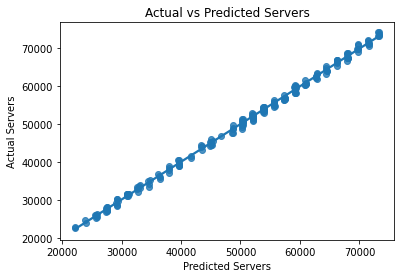

In [31]:
sns.regplot(x=pred, y=y_test)
plt.xlabel("Predicted Servers")
plt.ylabel('Actual Servers')
plt.title("Actual vs Predicted Servers")

In [52]:
pickle.dump(model, open('lin_reg_model.pkl', 'wb'))

Polynomial Regression

In [33]:
transformer = PolynomialFeatures(degree=2, include_bias=False)

In [34]:
X = df.drop(['nextPeriodReward'], axis = 1)
y = df['nextPeriodReward']

In [35]:
x_ = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X)

In [36]:
x_

array([[0.00000000e+00, 5.95161769e+00, 4.13580000e+04, ...,
        4.41000000e+02, 7.35714000e+05, 1.22738116e+09],
       [1.00000000e+00, 4.62040094e+00, 3.25160000e+04, ...,
        2.89000000e+02, 4.66276000e+05, 7.52295184e+08],
       [2.00000000e+00, 4.31617996e+00, 2.89230000e+04, ...,
        2.25000000e+02, 3.66330000e+05, 5.96434084e+08],
       ...,
       [6.69000000e+02, 9.33565872e+00, 8.39090000e+04, ...,
        1.76400000e+03, 2.99493600e+06, 5.08483086e+09],
       [6.70000000e+02, 8.76198867e+00, 7.60930000e+04, ...,
        1.44400000e+03, 2.45848600e+06, 4.18570181e+09],
       [6.71000000e+02, 8.20430306e+00, 7.01210000e+04, ...,
        1.22500000e+03, 2.08684000e+06, 3.55502138e+09]])

In [37]:
model= LinearRegression().fit(x_, y)

In [38]:
r_sq = model.score(x_, y)
r_sq

0.998220236789209

In [39]:
y_pred = model.predict(x_)

In [40]:
print("MAE: ", (metrics.mean_absolute_error(y_pred, y)))
print("MSE: ", (metrics.mean_squared_error(y_pred, y)))
print("R2 score: ", metrics.r2_score(y_pred, y))

MAE:  500.48486520849593
MSE:  358727.21989876847
R2 score:  0.9982171993376471


Advanced Linear Regression 

In [41]:
x = df.drop(['nextPeriodOptimalServers','requestWaitingTime',
             'totalInQueue', 'totalTimeInSystem', 'requestCancelled'], axis = 1)
y = df['nextPeriodOptimalServers']

In [42]:
x = sm.add_constant(x)
x

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,const,Unnamed: 0,requestStartWaiting,arrivalEvent,requestProcessed,CurrentPeriodNumberOfServers,nextPeriodReward,periodReward
0,1.0,0,41358,41358,41334,21,27428.0,35034.0
1,1.0,1,32516,32516,32528,17,24422.0,27428.0
2,1.0,2,28923,28923,28922,15,23599.0,24422.0
3,1.0,3,28106,28106,28099,15,22838.0,23599.0
4,1.0,4,27335,27335,27338,15,30212.0,22838.0
...,...,...,...,...,...,...,...,...
667,1.0,667,84075,84075,84055,42,73166.0,71455.0
668,1.0,668,86059,86059,86066,43,71308.0,73166.0
669,1.0,669,83909,83909,83908,42,64697.0,71308.0
670,1.0,670,76093,76093,76097,38,59624.0,64697.0


In [43]:
model = sm.OLS(y, x)

In [44]:
results = model.fit()

In [45]:
print(results.summary())

                               OLS Regression Results                               
Dep. Variable:     nextPeriodOptimalServers   R-squared:                       0.998
Model:                                  OLS   Adj. R-squared:                  0.998
Method:                       Least Squares   F-statistic:                 5.723e+04
Date:                      Sat, 28 Jan 2023   Prob (F-statistic):               0.00
Time:                              11:22:35   Log-Likelihood:                -256.81
No. Observations:                       672   AIC:                             527.6
Df Residuals:                           665   BIC:                             559.2
Df Model:                                 6                                         
Covariance Type:                  nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------

Neural Network

In [46]:
import tensorflow as tf
from tensorflow import keras


In [47]:
X = df.drop(['nextPeriodReward'], axis = 1)
y = df['nextPeriodReward']
X

,Unnamed: 0,totalInQueue,requestStartWaiting,arrivalEvent,requestWaitingTime,requestProcessed,totalTimeInSystem,requestCancelled,nextPeriodOptimalServers,CurrentPeriodNumberOfServers,periodReward
0,0,5.951618,41358,41358,0.363556,41334,1.862788,0.0,17.0,21,35034.0
1,1,4.620401,32516,32516,0.321547,32528,1.825141,0.0,15.0,17,27428.0
2,2,4.316180,28923,28923,0.345442,28922,1.849731,0.0,15.0,15,24422.0
3,3,3.892457,28106,28106,0.290824,28099,1.791418,0.0,15.0,15,23599.0
4,4,3.359002,27335,27335,0.243267,27338,1.743175,0.0,18.0,15,22838.0
...,...,...,...,...,...,...,...,...,...,...,...
667,667,9.835188,84075,84075,0.340564,84055,1.842283,0.0,43.0,42,71455.0
668,668,9.717940,86059,86059,0.329728,86066,1.831083,0.0,42.0,43,73166.0
669,669,9.335659,83909,83909,0.324110,83908,1.822104,0.0,38.0,42,71308.0
670,670,8.761989,76093,76093,0.333156,76097,1.832423,0.0,35.0,38,64697.0


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

In [49]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Activation(activation=tf.nn.softmax))

In [50]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [51]:
model.fit(X_train, y_train, epochs = 5)

Epoch 1/5


InvalidArgumentError: ignored

In [ ]:
model.evaluate(X_test, y_test)

Random Forest

In [ ]:
X = df.drop(['nextPeriodReward'], axis = 1)
y = df['nextPeriodReward']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.3)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

In [ ]:
model.score(X_val, y_val) #validation score

In [ ]:
model.score(X_test, y_test) #test score (end accuracy)

In [ ]:
#epsilon-greedy
def epsilon_greedy(min_nServers, max_nServers, prediction):
  epsilon = np.random.binomial(n=1, p=0.5)
  if epsilon == 1:
    nServers = np.random.uniform(low = min_nServers, high = max_nServers)
  else:
    nServers = prediction
  return round(nServers)

In [ ]:
#Linear Regression
def init_LR(X_train, y_train):
  model = LinearRegression()
  model.fit(X_train, y_train)
  return model

#Passive Agressive Regression
def init_PAR(X_train, y_train):
  model = linear_model.PassiveAggressiveRegressor()
  model.fit(X_train, y_train)
  return model

#Predict for any model
def predict(model, data):
    pred = model.predict(data)
    return pred


In [ ]:
model = init_PAR(X_train[0:15], y_train[0:15])
pred = round(predict(model, [X_test[0]])[0])
print('pred:', pred)
nServers = epsilon_greedy(10, 40, pred)
print('nServers:', nServers)